In [14]:
import pandas as pd
import geopandas as gpd
import csv
import re
import python.full_to_half as htf
import python.write_coordinate_to_csv as wctc
from shapely.geometry import Point
print('Pandas version: ', pd.__version__)
print('Geopandas version: ', gpd.__version__)

Pandas version:  1.4.3
Geopandas version:  0.11.0


In [4]:
df = pd.read_csv(f'./dataset/a_lvr_land_a.csv', encoding = 'utf-8')
print(type(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6977 entries, 0 to 6976
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           6977 non-null   object 
 1   交易標的           6977 non-null   object 
 2   土地位置建物門牌       6977 non-null   object 
 3   土地移轉總面積平方公尺    6977 non-null   object 
 4   都市土地使用分區       6867 non-null   object 
 5   非都市土地使用分區      1 non-null      object 
 6   非都市土地使用編定      1 non-null      object 
 7   交易年月日          6977 non-null   object 
 8   交易筆棟數          6977 non-null   object 
 9   移轉層次           6441 non-null   object 
 10  總樓層數           6436 non-null   object 
 11  建物型態           6977 non-null   object 
 12  主要用途           6316 non-null   object 
 13  主要建材           6440 non-null   object 
 14  建築完成年月         6179 non-null   object 
 15  建物移轉總面積平方公尺    6977 non-null   object 
 16  建物現況格局-房       6977 non-null   object 
 17  建物現況格局-廳      

In [5]:
filt = (df['鄉鎮市區'] == '大安區') & (df['主要用途'] == '住家用') & (~df['備註'].str.contains('親友', na=False)) & (~df['備註'].str.contains('預售屋', na=False)) & (~df['備註'].str.contains('地上權', na=False)) & (~df['備註'].str.contains('夾層', na=False)) & (df['交易標的'] == '房地(土地+建物)')
pre_df = df.loc[filt,['土地位置建物門牌','交易年月日','建築完成年月','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺']]
pre_df = pre_df.dropna()
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 76 to 6947
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   土地位置建物門牌  197 non-null    object
 1   交易年月日     197 non-null    object
 2   建築完成年月    197 non-null    object
 3   建物現況格局-房  197 non-null    object
 4   建物現況格局-廳  197 non-null    object
 5   建物現況格局-衛  197 non-null    object
 6   電梯        197 non-null    object
 7   單價元平方公尺   197 non-null    object
dtypes: object(8)
memory usage: 13.9+ KB


In [6]:
pre_df['屋齡']=pre_df['交易年月日'].str[0:3].astype(int)-pre_df['建築完成年月'].str[0:3].astype(int)

In [7]:
pre_df = pre_df[['土地位置建物門牌','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺']]
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 76 to 6947
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   土地位置建物門牌  197 non-null    object
 1   屋齡        197 non-null    int64 
 2   建物現況格局-房  197 non-null    object
 3   建物現況格局-廳  197 non-null    object
 4   建物現況格局-衛  197 non-null    object
 5   電梯        197 non-null    object
 6   單價元平方公尺   197 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.3+ KB


In [10]:
pattern = r'[0-9]*?[零一二三四五六七八九十]*?[0-9]*?[零一二三四五六七八九十]{1}[0-9]*?[號]'
pre_df['修正地址'] = pre_df['土地位置建物門牌'].str.contains(pattern,regex=True)
pre_df['土地位置建物門牌'] = htf.h2f(pre_df['土地位置建物門牌'])
pre_df.to_csv('pre_df.csv')

In [12]:
wctc.write('pre_df.csv', 'pre_df_WGS84.csv', 1,8)

progress: 100.0000%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        197 non-null    int64   
 1   屋齡        197 non-null    int64   
 2   建物現況格局-房  197 non-null    int64   
 3   建物現況格局-廳  197 non-null    int64   
 4   建物現況格局-衛  197 non-null    int64   
 5   電梯        197 non-null    object  
 6   單價元平方公尺   197 non-null    int64   
 7   geometry  197 non-null    geometry
dtypes: geometry(1), int64(6), object(1)
memory usage: 12.4+ KB


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

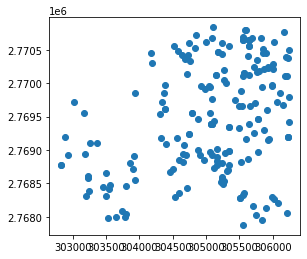

In [90]:
df_final=pd.read_csv('pre_df_WGS84.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_final.lon, df_final.lat)]
crs = {'init': 'epsg:4326'}
gf_final = gpd.GeoDataFrame(df_final, crs=crs, geometry=geom)
gf_final = gf_final.to_crs(epsg=3826)
gf_final['ID'] = gf_final.index
gf_final = gf_final[['ID','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺','geometry']]
gf_final.info()
gf_final.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        197 non-null    int64   
 1   屋齡        197 non-null    int64   
 2   建物現況格局-房  197 non-null    int64   
 3   建物現況格局-廳  197 non-null    int64   
 4   建物現況格局-衛  197 non-null    int64   
 5   電梯        197 non-null    object  
 6   單價元平方公尺   197 non-null    int64   
 7   geometry  197 non-null    geometry
dtypes: geometry(1), int64(6), object(1)
memory usage: 12.4+ KB


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

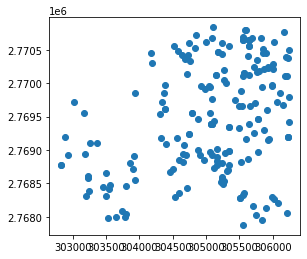

In [91]:
df_house=pd.read_csv('pre_df_WGS84.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_house.lon, df_house.lat)]
crs = {'init': 'epsg:4326'}
gf_house = gpd.GeoDataFrame(df_house, crs=crs, geometry=geom)
gf_house = gf_house.to_crs(epsg=3826)
gf_house['ID'] = gf_house.index
gf_house = gf_house[['ID','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺','geometry']]
gf_house.info()
gf_house.plot()

In [ ]:
gf_house_buf = gf_house
gf_house_buf['geometry'] = gf_house.buffer(500)
gf_house_buf.plot(alpha=0.1)

In [92]:
df_hospital=pd.read_csv('./dataset/taiwan_hospital_getcoordinates.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_hospital.lon, df_hospital.lat)]
crs = {'init': 'epsg:4326'}
gf_hospital = gpd.GeoDataFrame(df_hospital, crs=crs, geometry=geom)
gf_hospital = gf_hospital.to_crs(epsg=3826)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [94]:
df_cstore=pd.read_csv('./dataset/taiwan_convenience_store_getcoordinates.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_cstore.lon, df_cstore.lat)]
crs = {'init': 'epsg:4326'}
gf_cstore = gpd.GeoDataFrame(df_cstore, crs=crs, geometry=geom)
gf_cstore = gf_cstore.to_crs(epsg=3826)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [143]:
# 讀取geojspn
gf_cemetery = gpd.read_file(f'./dataset/cemetery.geojson', encoding = 'utf-8')
gf_cemetery = gf_cemetery.to_crs(epsg=3826)

gf_fire_station = gpd.read_file(f'./dataset/fire_station.geojson', encoding = 'utf-8')
gf_fire_station = gf_fire_station.to_crs(epsg=3826)

gf_fuel = gpd.read_file(f'./dataset/fuel.geojson', encoding = 'utf-8')
gf_fuel = gf_fuel.to_crs(epsg=3826)

gf_library = gpd.read_file(f'./dataset/library.geojson', encoding = 'utf-8')
gf_library = gf_library.to_crs(epsg=3826)

gf_marketplace = gpd.read_file(f'./dataset/marketplace.geojson', encoding = 'utf-8')
gf_marketplace = gf_marketplace.to_crs(epsg=3826)

gf_park = gpd.read_file(f'./dataset/park.geojson', encoding = 'utf-8')
gf_park = gf_park.to_crs(epsg=3826)

gf_parking = gpd.read_file(f'./dataset/parking.geojson', encoding = 'utf-8')
gf_parking = gf_parking.to_crs(epsg=3826)

gf_place_of_worship = gpd.read_file(f'./dataset/place_of_worship.geojson', encoding = 'utf-8')
gf_place_of_worship = gf_place_of_worship.to_crs(epsg=3826)

gf_police = gpd.read_file(f'./dataset/police.geojson', encoding = 'utf-8')
gf_police = gf_police.to_crs(epsg=3826)

gf_school = gpd.read_file(f'./dataset/school.geojson', encoding = 'utf-8')
gf_school = gf_school.to_crs(epsg=3826)

gf_station = gpd.read_file(f'./dataset/station.geojson', encoding = 'utf-8')
gf_station = gf_station.to_crs(epsg=3826)

gf_university = gpd.read_file(f'./dataset/university.geojson', encoding = 'utf-8')
gf_university = gf_university.to_crs(epsg=3826)

<AxesSubplot:>

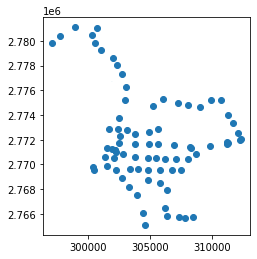

In [159]:
gf_station.plot()

<AxesSubplot:>

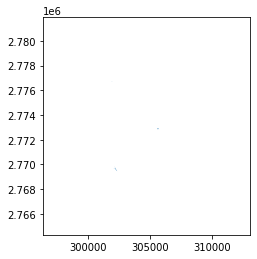

In [160]:
gf_station['geometry'] = gf_station.buffer(0.001)
gf_station.plot()

In [161]:
intersection = gpd.overlay(gf_house_buf,gf_station,  how='intersection', keep_geom_type=True)
#intersection['PARKING_AREA'] = intersection['geometry'].area
intersection_count = intersection.groupby('ID').agg({'id':'count'})
#intersection_count = intersection.groupby('ID').agg({'PARKING_AREA':'sum'})
intersection_count

,id
ID,
0,1
1,1
2,1
3,1
5,1
...,...
192,1
193,1
194,2


In [162]:
gf_final = gf_final.merge(intersection_count,how='left', left_on='ID', right_on='ID')

In [163]:
gf_final.rename(columns={'id': 'NEAR_STATION'}, inplace=True)
gf_final.loc[gf_final['NEAR_STATION']>0, 'NEAR_STATION'] = 1
gf_final['NEAR_STATION'] = gf_final['NEAR_STATION'].fillna(0)
print(gf_final.info())
gf_final

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                197 non-null    int64   
 1   屋齡                197 non-null    int64   
 2   建物現況格局-房          197 non-null    int64   
 3   建物現況格局-廳          197 non-null    int64   
 4   建物現況格局-衛          197 non-null    int64   
 5   電梯                197 non-null    object  
 6   單價元平方公尺           197 non-null    int64   
 7   geometry          197 non-null    geometry
 8   NEAR_CEMETERY     197 non-null    float64 
 9   NEAR_UNIVERSITY   197 non-null    float64 
 10  NEAR_FIRESTATION  197 non-null    float64 
 11  NEAR_FUEL         197 non-null    float64 
 12  NEAR_LIBRARY      197 non-null    float64 
 13  NEAR_MARKET       197 non-null    float64 
 14  PARK_AREA         197 non-null    float64 
 15  PARKING_AREA      197 non-null    float64 
 16  TEMPLE_COUNT      

,ID,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,單價元平方公尺,geometry,NEAR_CEMETERY,NEAR_UNIVERSITY,NEAR_FIRESTATION,NEAR_FUEL,NEAR_LIBRARY,NEAR_MARKET,PARK_AREA,PARKING_AREA,TEMPLE_COUNT,NEAR_POLICE,NEAR_SCHOOL,NEAR_STATION
0,0,37,3,2,2,有,245443,POINT (305313.398 2768682.942),0.0,1.0,0.0,0.0,1.0,1.0,19653.307239,13775.425698,8,0.0,1.0,1.0
1,1,37,2,2,2,有,257275,POINT (305163.377 2768831.302),0.0,1.0,0.0,0.0,1.0,1.0,20919.333198,12957.853283,11,0.0,1.0,1.0
2,2,36,5,4,2,有,314764,POINT (304703.063 2768917.030),0.0,1.0,1.0,0.0,1.0,1.0,23525.477676,27422.414906,14,0.0,1.0,1.0
3,3,43,3,1,2,有,286978,POINT (306238.393 2770496.194),0.0,0.0,0.0,0.0,1.0,0.0,2238.024797,12636.293073,4,0.0,1.0,1.0
4,4,35,5,3,4,無,228840,POINT (303493.585 2768658.586),0.0,1.0,0.0,0.0,1.0,1.0,12067.008462,6957.973273,9,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,41,1,2,1,無,244575,POINT (305866.179 2769305.300),0.0,1.0,1.0,1.0,0.0,1.0,15156.406721,10202.851572,13,1.0,1.0,1.0
193,193,45,1,1,1,有,351357,POINT (305569.615 2770146.843),0.0,0.0,0.0,0.0,1.0,0.0,3895.968612,1301.769972,5,0.0,1.0,1.0
194,194,45,3,2,2,有,338271,POINT (305083.662 2770683.814),0.0,0.0,0.0,0.0,1.0,0.0,6493.913369,4541.795367,3,0.0,0.0,1.0
195,195,44,4,2,2,有,284970,POINT (305899.431 2770459.877),0.0,0.0,0.0,0.0,0.0,0.0,2238.024797,7427.781357,8,0.0,1.0,1.0


In [164]:
gf_final.loc[gf_final['電梯']=='有', '電梯'] = 1
gf_final.loc[gf_final['電梯']=='無', '電梯'] = 0
gf_final

,ID,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,單價元平方公尺,geometry,NEAR_CEMETERY,NEAR_UNIVERSITY,NEAR_FIRESTATION,NEAR_FUEL,NEAR_LIBRARY,NEAR_MARKET,PARK_AREA,PARKING_AREA,TEMPLE_COUNT,NEAR_POLICE,NEAR_SCHOOL,NEAR_STATION
0,0,37,3,2,2,1,245443,POINT (305313.398 2768682.942),0.0,1.0,0.0,0.0,1.0,1.0,19653.307239,13775.425698,8,0.0,1.0,1.0
1,1,37,2,2,2,1,257275,POINT (305163.377 2768831.302),0.0,1.0,0.0,0.0,1.0,1.0,20919.333198,12957.853283,11,0.0,1.0,1.0
2,2,36,5,4,2,1,314764,POINT (304703.063 2768917.030),0.0,1.0,1.0,0.0,1.0,1.0,23525.477676,27422.414906,14,0.0,1.0,1.0
3,3,43,3,1,2,1,286978,POINT (306238.393 2770496.194),0.0,0.0,0.0,0.0,1.0,0.0,2238.024797,12636.293073,4,0.0,1.0,1.0
4,4,35,5,3,4,0,228840,POINT (303493.585 2768658.586),0.0,1.0,0.0,0.0,1.0,1.0,12067.008462,6957.973273,9,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,41,1,2,1,0,244575,POINT (305866.179 2769305.300),0.0,1.0,1.0,1.0,0.0,1.0,15156.406721,10202.851572,13,1.0,1.0,1.0
193,193,45,1,1,1,1,351357,POINT (305569.615 2770146.843),0.0,0.0,0.0,0.0,1.0,0.0,3895.968612,1301.769972,5,0.0,1.0,1.0
194,194,45,3,2,2,1,338271,POINT (305083.662 2770683.814),0.0,0.0,0.0,0.0,1.0,0.0,6493.913369,4541.795367,3,0.0,0.0,1.0
195,195,44,4,2,2,1,284970,POINT (305899.431 2770459.877),0.0,0.0,0.0,0.0,0.0,0.0,2238.024797,7427.781357,8,0.0,1.0,1.0


In [165]:
gf_final = gf_final[['屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','NEAR_CEMETERY','NEAR_UNIVERSITY','NEAR_FIRESTATION','NEAR_FUEL','NEAR_LIBRARY','NEAR_MARKET','PARK_AREA','PARKING_AREA','TEMPLE_COUNT','NEAR_POLICE','NEAR_SCHOOL','NEAR_STATION','單價元平方公尺']]
gf_final.to_csv('final_df.csv')